# Growing Strategies

# Incremental Growing Strategy (Dynamic Arrays)

**Goal:** Understand what the incremental growing strategy is, how it behaves, and why most languages prefer geometric growth (e.g., doubling) instead.

> In a dynamic array, if we add elements and run out of space, the runtime must allocate a new, larger block and copy the old elements over.  
> With incremental growing, capacity increases by a fixed amount `+k` each time it fills up.

## Summary
- Incremental growth bumps capacity by a constant `k` every time the array is full.  
- This causes many resizes and lots of copying as `n` grows.  
- Result: amortized time per append becomes Theta(n) — not scalable.  
- Geometric growth (e.g., `x2`) gives amortized O(1) appends.

## Setup
We'll simulate a tiny dynamic array that grows incrementally by `k` slots when full (and, for comparison, one that grows geometrically by a factor, e.g. `x2`).

In [25]:
import math

def simulate_incremental(n=300, k=10, init=0):
    # Simulate appends into a dynamic array that grows by +k each time it fills.
    capacity = max(init, k)  # ensure capacity starts at least k
    size = 0
    copies = 0  # cumulative number of elements copied across all resizes
    capacities, sizes, cumulative_copies = [], [], []
    resize_steps, copied_on_resize = [], []
    for step in range(n):
        if size == capacity:            # need to grow
            copies += size              # copy existing elements to the new buffer
            capacity += k               # incremental growth
            resize_steps.append(step)
            copied_on_resize.append(size)
        size += 1
        capacities.append(capacity)
        sizes.append(size)
        cumulative_copies.append(copies)
    return {
        "capacities": capacities,
        "sizes": sizes,
        "cumulative_copies": cumulative_copies,
        "resize_steps": resize_steps,
        "copied_on_resize": copied_on_resize
    }

def simulate_geometric(n=300, factor=2, init=1):
    # Simulate appends into a dynamic array that grows by xfactor when full.
    capacity = max(init, 1)
    size = 0
    copies = 0
    capacities, sizes, cumulative_copies = [], [], []
    resize_steps, copied_on_resize = [], []
    for step in range(n):
        if size == capacity:
            copies += size
            capacity = max(1, int(math.ceil(capacity * factor)))
            resize_steps.append(step)
            copied_on_resize.append(size)
        size += 1
        capacities.append(capacity)
        sizes.append(size)
        cumulative_copies.append(copies)
    return {
        "capacities": capacities,
        "sizes": sizes,
        "cumulative_copies": cumulative_copies,
        "resize_steps": resize_steps,
        "copied_on_resize": copied_on_resize
    }


In [26]:
N = 200  # elements to append
K = 10   # incremental bump size (+K each time capacity is full)

## 1) What does incremental growth look like?
Capacity rises in equal steps. The plot below shows the current capacity and current size as we append elements.

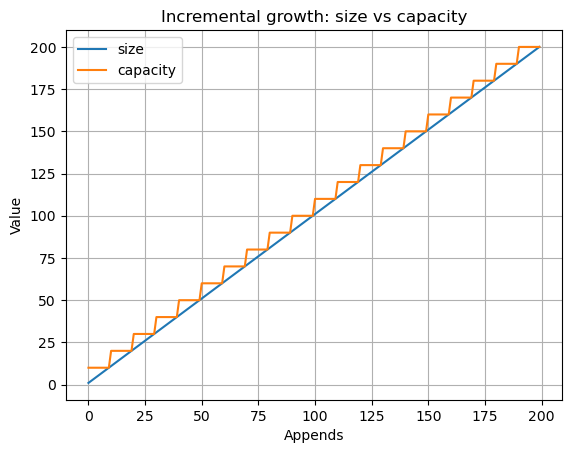

In [27]:
import matplotlib.pyplot as plt

inc = simulate_incremental(n=N, k=K)

plt.figure()
plt.plot(inc["sizes"], label="size")
plt.plot(inc["capacities"], label="capacity")
plt.title("Incremental growth: size vs capacity")
plt.xlabel("Appends")
plt.ylabel("Value")
plt.legend()
plt.grid(visible=True)
plt.show()


## 2) Hidden cost: copies pile up
Every resize must copy all existing elements into the new block.  
Below we track the cumulative number of elements copied over time.

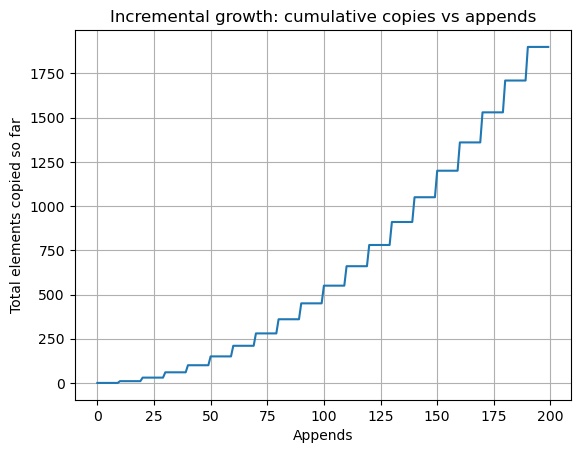

In [28]:
plt.figure()
plt.plot(inc["cumulative_copies"])
plt.title("Incremental growth: cumulative copies vs appends")
plt.xlabel("Appends")
plt.ylabel("Total elements copied so far")
plt.grid(visible=True)
plt.show()


## 3) Why do people prefer geometric growth?
Let's compare incremental (+K) vs geometric (x2) growth.  
We'll plot the cumulative copies each strategy performs for the same number of appends.

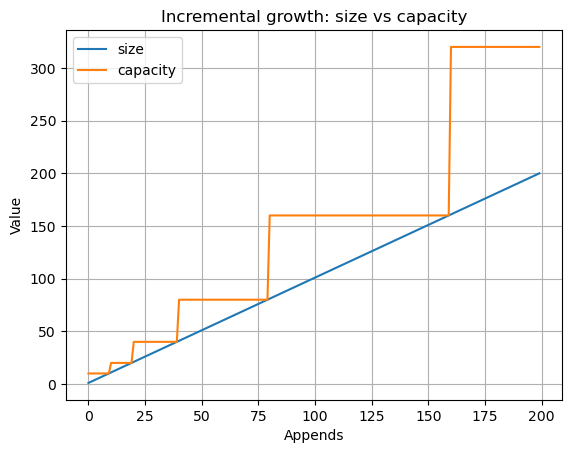

In [29]:
import matplotlib.pyplot as plt

geo = simulate_geometric(n=N, factor=2, init=max(1, K))  # start with a similar initial capacity

plt.figure()
plt.plot(geo["sizes"], label="size")
plt.plot(geo["capacities"], label="capacity")
plt.title("Incremental growth: size vs capacity")
plt.xlabel("Appends")
plt.ylabel("Value")
plt.legend()
plt.grid(visible=True)
plt.show()

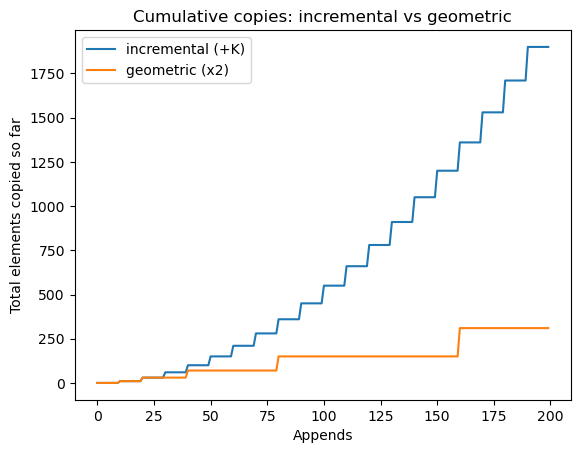

In [30]:
geo = simulate_geometric(n=N, factor=2, init=max(1, K))  # start with a similar initial capacity

plt.figure()
plt.plot(inc["cumulative_copies"], label="incremental (+K)")
plt.plot(geo["cumulative_copies"], label="geometric (x2)")
plt.title("Cumulative copies: incremental vs geometric")
plt.xlabel("Appends")
plt.ylabel("Total elements copied so far")
plt.legend()
plt.show()

## 4) Amortized cost intuition
- Incremental (+K): Resizes happen roughly every K appends, and each resize copies more and more data (K, 2K, 3K, ...).  
  The total copies after n appends grow like the series K + 2K + ... + n ~= Theta(n^2).  
  Amortized cost per append ~= Theta(n).
- Geometric (x2): Resizes are rarer (capacity doubles), and the total number of copied elements across all resizes up to n is ~= 2n.  
  Amortized cost per append ~= O(1).

## 5) Try it yourself
Change `N`, `K`, and the geometric factor below and rerun the cell to see how the curves change.

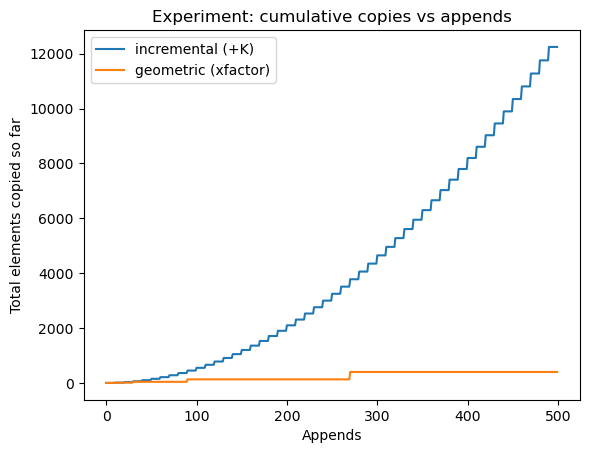

In [32]:
# Experiment here:
N = 500     # number of appends
K = 10       # incremental bump per resize
FACTOR = 3  # geometric growth factor

inc = simulate_incremental(n=N, k=K)
geo = simulate_geometric(n=N, factor=FACTOR, init=max(1, K))

plt.figure()
plt.plot(inc["cumulative_copies"], label="incremental (+K)")
plt.plot(geo["cumulative_copies"], label="geometric (xfactor)")
plt.title("Experiment: cumulative copies vs appends")
plt.xlabel("Appends")
plt.ylabel("Total elements copied so far")
plt.legend()
plt.show()


## Key Takeaways
- Incremental growth keeps memory overhead small but causes quadratic copying work as arrays get large.  
- Geometric growth uses a bit more slack space but delivers amortized O(1) appends.  
- Real-world runtimes (e.g., Python `list`) therefore prefer geometric growth, not incremental.